In [440]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

import seaborn as sns
sns.set_style('white')

from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [274]:
url="https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv"
df=pd.read_csv(url)

In [275]:
df.head(3)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [276]:
type(df)

pandas.core.frame.DataFrame

In [277]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1310 entries, 0 to 1309
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   float64
 1   survived   1309 non-null   float64
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   float64
 6   parch      1309 non-null   float64
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(7), object(7)
memory usage: 143.4+ KB


In [278]:
df.sample(5)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
600,3.0,0.0,"Abbing, Mr. Anthony",male,42.0,0.0,0.0,C.A. 5547,7.5500,NaN,S,NaN,NaN,NaN
39,1.0,0.0,"Brandeis, Mr. Emil",male,48.0,0.0,0.0,PC 17591,50.4958,B10,C,NaN,208.0,"Omaha, NE"
111,1.0,1.0,"Fortune, Miss. Alice Elizabeth",female,24.0,3.0,2.0,19950,263.0000,C23 C25 C27,S,10,NaN,"Winnipeg, MB"
175,1.0,0.0,"Kenyon, Mr. Frederick R",male,41.0,1.0,0.0,17464,51.8625,D21,S,NaN,NaN,"Southington / Noank, CT"
525,2.0,0.0,"Pain, Dr. Alfred",male,23.0,0.0,0.0,244278,10.5000,NaN,S,NaN,NaN,"Hamilton, ON"


In [279]:
print("Data frame columns with null values\n", df.isnull().sum())

Data frame columns with null values
 pclass          1
survived        1
name            1
sex             1
age           264
sibsp           1
parch           1
ticket          1
fare            2
cabin        1015
embarked        3
boat          824
body         1189
home.dest     565
dtype: int64


In [280]:
df.describe(include="all")

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
count,1309.000000,1309.000000,1309,1309,1046.000000,1309.000000,1309.000000,1309,1308.000000,295,1307,486,121.000000,745
unique,NaN,NaN,1307,2,NaN,NaN,NaN,929,NaN,186,3,27,NaN,369
top,NaN,NaN,"Kelly, Mr. James",male,NaN,NaN,NaN,CA. 2343,NaN,C23 C25 C27,S,13,NaN,"New York, NY"
freq,NaN,NaN,2,843,NaN,NaN,NaN,11,NaN,6,914,39,NaN,64
mean,2.294882,0.381971,NaN,NaN,29.881135,0.498854,0.385027,NaN,33.295479,NaN,NaN,NaN,160.809917,NaN
std,0.837836,0.486055,NaN,NaN,14.413500,1.041658,0.865560,NaN,51.758668,NaN,NaN,NaN,97.696922,NaN
min,1.000000,0.000000,NaN,NaN,0.166700,0.000000,0.000000,NaN,0.000000,NaN,NaN,NaN,1.000000,NaN
25%,2.000000,0.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN,NaN,72.000000,NaN
50%,3.000000,0.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN,NaN,155.000000,NaN
75%,3.000000,1.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.275000,NaN,NaN,NaN,256.000000,NaN


In [281]:
df["age"].max()

80.0

In [282]:
df["age"].min()

0.1667

In [283]:
df["age"].unique()

array([29.    ,  0.9167,  2.    , 30.    , 25.    , 48.    , 63.    ,
       39.    , 53.    , 71.    , 47.    , 18.    , 24.    , 26.    ,
       80.    ,     nan, 50.    , 32.    , 36.    , 37.    , 42.    ,
       19.    , 35.    , 28.    , 45.    , 40.    , 58.    , 22.    ,
       41.    , 44.    , 59.    , 60.    , 33.    , 17.    , 11.    ,
       14.    , 49.    , 76.    , 46.    , 27.    , 64.    , 55.    ,
       70.    , 38.    , 51.    , 31.    ,  4.    , 54.    , 23.    ,
       43.    , 52.    , 16.    , 32.5   , 21.    , 15.    , 65.    ,
       28.5   , 45.5   , 56.    , 13.    , 61.    , 34.    ,  6.    ,
       57.    , 62.    , 67.    ,  1.    , 12.    , 20.    ,  0.8333,
        8.    ,  0.6667,  7.    ,  3.    , 36.5   , 18.5   ,  5.    ,
       66.    ,  9.    ,  0.75  , 70.5   , 22.5   ,  0.3333,  0.1667,
       40.5   , 10.    , 23.5   , 34.5   , 20.5   , 30.5   , 55.5   ,
       38.5   , 14.5   , 24.5   , 60.5   , 74.    ,  0.4167, 11.5   ,
       26.5   ])

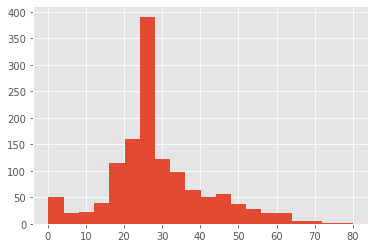

In [421]:
plt.hist(df["age"], bins=20)
plt.show()

In [285]:
df["age"].fillna(df["age"].median(), inplace=True)

In [286]:
df["age"].isnull().sum()

0

In [287]:
df["embarked"].isnull().sum()

3

In [288]:
df["embarked"].value_counts()

S    914
C    270
Q    123
Name: embarked, dtype: int64

In [289]:
df["embarked"].fillna(df["embarked"].mode(),inplace=True)

In [290]:
df["embarked"].isnull().sum()

3

In [291]:
df["embarked"].fillna(df["embarked"].mode()[0],inplace=True)

In [292]:
df["embarked"].isnull().sum()

0

In [293]:
df["fare"].max()

512.3292

In [294]:
df["fare"].min()

0.0

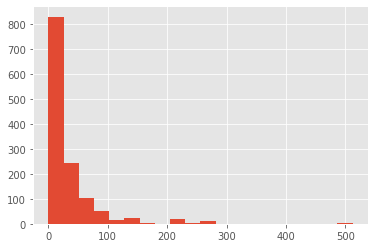

In [422]:
plt.hist(df["fare"], bins=20)
plt.show()

In [296]:
df["fare"].fillna(df["fare"].median(), inplace=True)

In [297]:
df["fare"].isnull().sum()

0

In [298]:
drop_columns=["ticket","cabin", "body","boat","home.dest"]
df.drop(drop_columns, axis=1, inplace=True)

In [299]:
df.dropna(inplace=True)

In [300]:
df.isnull().sum()

pclass      0
survived    0
name        0
sex         0
age         0
sibsp       0
parch       0
fare        0
embarked    0
dtype: int64

In [301]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 1308
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1309 non-null   float64
 1   survived  1309 non-null   float64
 2   name      1309 non-null   object 
 3   sex       1309 non-null   object 
 4   age       1309 non-null   float64
 5   sibsp     1309 non-null   float64
 6   parch     1309 non-null   float64
 7   fare      1309 non-null   float64
 8   embarked  1309 non-null   object 
dtypes: float64(6), object(3)
memory usage: 102.3+ KB


In [302]:
#creating a familysize column
df["family_size"]=df["sibsp"]+df["parch"]+1

In [303]:
#creating an is_alone column (1=alone,0= more than 1 family member)
df["is_alone"]=1
df.loc[df["family_size"]>1, ["is_alone"]]=0

In [304]:
df["is_alone"].value_counts()

1    790
0    519
Name: is_alone, dtype: int64

### Splitting titles from names

In [305]:
df["name"]

0                         Allen, Miss. Elisabeth Walton
1                        Allison, Master. Hudson Trevor
2                          Allison, Miss. Helen Loraine
3                  Allison, Mr. Hudson Joshua Creighton
4       Allison, Mrs. Hudson J C (Bessie Waldo Daniels)
                             ...                       
1304                               Zabour, Miss. Hileni
1305                              Zabour, Miss. Thamine
1306                          Zakarian, Mr. Mapriededer
1307                                Zakarian, Mr. Ortin
1308                                 Zimmerman, Mr. Leo
Name: name, Length: 1309, dtype: object

In [306]:
df["name"].str.split(",",expand=True)

,0,1
0,Allen,Miss. Elisabeth Walton
1,Allison,Master. Hudson Trevor
2,Allison,Miss. Helen Loraine
3,Allison,Mr. Hudson Joshua Creighton
4,Allison,Mrs. Hudson J C (Bessie Waldo Daniels)
...,...,...
1304,Zabour,Miss. Hileni
1305,Zabour,Miss. Thamine
1306,Zakarian,Mr. Mapriededer
1307,Zakarian,Mr. Ortin


In [307]:
df["title"]=df["name"].str.split(",",expand=True)[1]


In [308]:
df["title"].str.split(".", expand=True)

,0,1,2
0,Miss,Elisabeth Walton,None
1,Master,Hudson Trevor,None
2,Miss,Helen Loraine,None
3,Mr,Hudson Joshua Creighton,None
4,Mrs,Hudson J C (Bessie Waldo Daniels),None
...,...,...,...
1304,Miss,Hileni,None
1305,Miss,Thamine,None
1306,Mr,Mapriededer,None
1307,Mr,Ortin,None


In [309]:
df["title"]=df["title"].str.split(".", expand=True)[0]
df["title"]

0          Miss
1        Master
2          Miss
3            Mr
4           Mrs
         ...   
1304       Miss
1305       Miss
1306         Mr
1307         Mr
1308         Mr
Name: title, Length: 1309, dtype: object

##### another shorter way

In [310]:
df["title"]=df["name"].str.split(", ", expand=True)[1].str.split(".", expand=True)[0]
df["title"]

0         Miss
1       Master
2         Miss
3           Mr
4          Mrs
         ...  
1304      Miss
1305      Miss
1306        Mr
1307        Mr
1308        Mr
Name: title, Length: 1309, dtype: object

#### Creating countinous variable bins

In [311]:
df["fare_bins"]=pd.qcut(df["fare"],4)

In [312]:
df["age_bins"]=pd.cut(df["age"].astype(int),5)

#### Cleaning Rate title

In [313]:
df["title"].value_counts()

Mr              757
Miss            260
Mrs             197
Master           61
Rev               8
Dr                8
Col               4
Major             2
Mlle              2
Ms                2
Dona              1
Mme               1
Sir               1
Don               1
Jonkheer          1
Lady              1
Capt              1
the Countess      1
Name: title, dtype: int64

In [314]:
stat_min=10
title_names=df["title"].value_counts()<10
title_names


Mr              False
Miss            False
Mrs             False
Master          False
Rev              True
Dr               True
Col              True
Major            True
Mlle             True
Ms               True
Dona             True
Mme              True
Sir              True
Don              True
Jonkheer         True
Lady             True
Capt             True
the Countess     True
Name: title, dtype: bool

In [315]:
df['title'] = df['title'].apply(lambda x: 'Misc' if title_names.loc[x] == True else x)

In [316]:
df["title"].value_counts()

Mr        757
Miss      260
Mrs       197
Master     61
Misc       34
Name: title, dtype: int64

In [317]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   pclass       1309 non-null   float64 
 1   survived     1309 non-null   float64 
 2   name         1309 non-null   object  
 3   sex          1309 non-null   object  
 4   age          1309 non-null   float64 
 5   sibsp        1309 non-null   float64 
 6   parch        1309 non-null   float64 
 7   fare         1309 non-null   float64 
 8   embarked     1309 non-null   object  
 9   family_size  1309 non-null   float64 
 10  is_alone     1309 non-null   int64   
 11  title        1309 non-null   object  
 12  fare_bins    1309 non-null   category
 13  age_bins     1309 non-null   category
dtypes: category(2), float64(7), int64(1), object(4)
memory usage: 136.0+ KB


In [318]:
df.sample(5)

,pclass,survived,name,sex,age,sibsp,parch,fare,embarked,family_size,is_alone,title,fare_bins,age_bins
200,1.0,0.0,"McCaffry, Mr. Thomas Francis",male,46.0,0.0,0.0,75.2417,C,1.0,1,Mr,"(31.275, 512.329]","(32.0, 48.0]"
834,3.0,0.0,"Gronnestad, Mr. Daniel Danielsen",male,32.0,0.0,0.0,8.3625,S,1.0,1,Mr,"(7.896, 14.454]","(16.0, 32.0]"
1110,3.0,0.0,"Pavlovic, Mr. Stefo",male,32.0,0.0,0.0,7.8958,S,1.0,1,Mr,"(-0.001, 7.896]","(16.0, 32.0]"
1307,3.0,0.0,"Zakarian, Mr. Ortin",male,27.0,0.0,0.0,7.2250,C,1.0,1,Mr,"(-0.001, 7.896]","(16.0, 32.0]"
797,3.0,0.0,"Farrell, Mr. James",male,40.5,0.0,0.0,7.7500,Q,1.0,1,Mr,"(-0.001, 7.896]","(32.0, 48.0]"


In [319]:
from sklearn import preprocessing

In [320]:
label = preprocessing.LabelEncoder()

In [321]:
#convert object variables to category
df['sex_code'] = label.fit_transform(df['sex'])
df['sex_code']

0       0
1       1
2       0
3       1
4       0
       ..
1304    0
1305    0
1306    1
1307    1
1308    1
Name: sex_code, Length: 1309, dtype: int32

In [322]:
df['embarked_code'] = label.fit_transform(df['embarked'])
df["title_code"] =label.fit_transform(df["title"])
df["age_bins_code"]=label.fit_transform(df["age_bins"])
df["fare_bins_code"]=label.fit_transform(df["fare_bins"])


In [323]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 1308
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   pclass          1309 non-null   float64 
 1   survived        1309 non-null   float64 
 2   name            1309 non-null   object  
 3   sex             1309 non-null   object  
 4   age             1309 non-null   float64 
 5   sibsp           1309 non-null   float64 
 6   parch           1309 non-null   float64 
 7   fare            1309 non-null   float64 
 8   embarked        1309 non-null   object  
 9   family_size     1309 non-null   float64 
 10  is_alone        1309 non-null   int64   
 11  title           1309 non-null   object  
 12  fare_bins       1309 non-null   category
 13  age_bins        1309 non-null   category
 14  sex_code        1309 non-null   int32   
 15  embarked_code   1309 non-null   int32   
 16  title_code      1309 non-null   int32   
 17  age_bins_code 

#### Train test Split

In [343]:
 #defining y variable
target=["survived"]
    
#pretty name/values for charts
df_x = ['sex','pclass', 'embarked', 'title','sibsp', 'parch', 'age', 'fare', 'family_size', 'is_alone']

#coded for algorithm calculation
df_x_calc = ['sex_Code','pclass', 'embarked_code', 'title_code','sibsp', 'parch', 'age', 'fare']

#define x variables for original w/bin features to remove continuous variables
df_x_bin = ['sex_code','pclass', 'embarked_code', 'title_code', 'family_size', 'age_bins_code', 'fare_bins_code']

In [344]:
from sklearn.model_selection import train_test_split

In [345]:
train_x,test_x,train_y,test_y=train_test_split(df[df_x ], df[target], random_state=0)

In [346]:
train_x_bin,test_x_bin,train_y_bin,test_y_bin=train_test_split(df[df_x_bin], df[target], random_state=0)

In [347]:
df.shape

(1309, 19)

In [348]:
train_x.shape

(981, 10)

In [349]:
test_x.shape

(328, 10)

In [350]:
train_x_bin.shape

(981, 7)

In [351]:
test_x_bin.shape

(328, 7)

### Perform Exploratory Analysis with Statistics

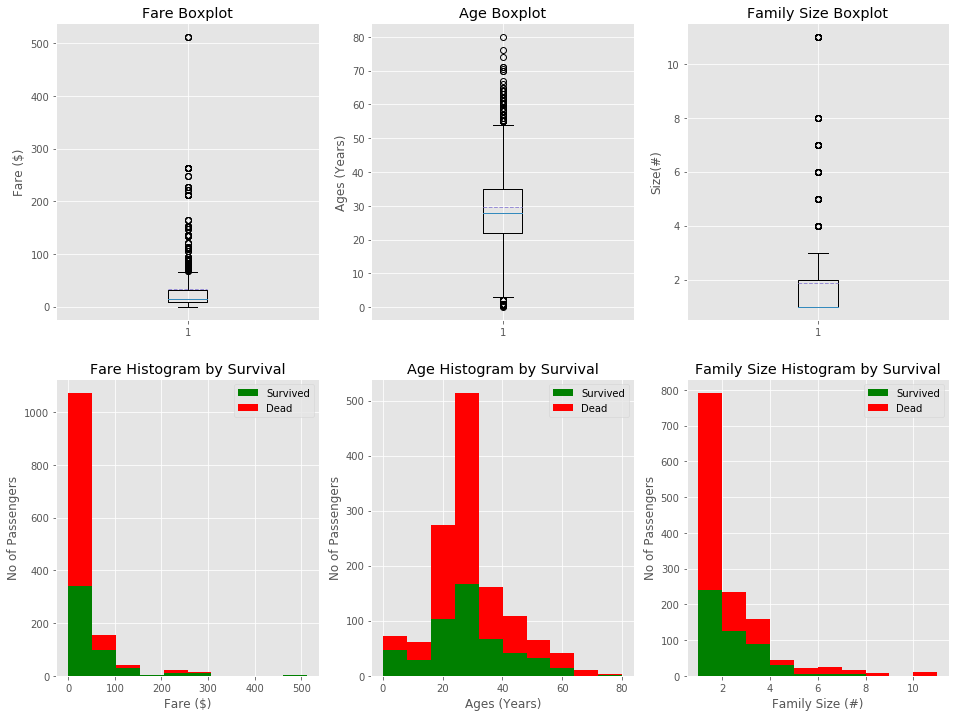

In [423]:
plt.figure(figsize=[16,12])
plt.subplot(2,3,1)
plt.boxplot(x=df['fare'], showmeans = True, meanline = True)
plt.title('Fare Boxplot')
plt.ylabel('Fare ($)')

plt.subplot(2,3,2)
plt.boxplot(x=df['age'] , showmeans = True,meanline = True)
plt.title('Age Boxplot')
plt.ylabel('Ages (Years)')

plt.subplot(2,3,3)
plt.boxplot(x=df['family_size'] , showmeans = True,meanline = True)
plt.title('Family Size Boxplot')
plt.ylabel('Size(#)')

plt.subplot(2,3,4)
plt.hist(x=[df.loc[df["survived"]==1, "fare"],df.loc[df["survived"]==0, "fare"]],
        stacked=True, color=["g","r"], label=["Survived","Dead"])
plt.title('Fare Histogram by Survival')
plt.ylabel('No of Passengers')
plt.xlabel('Fare ($)')
plt.legend()

plt.subplot(2,3,5)
plt.hist(x=[df.loc[df["survived"]==1, "age"],df.loc[df["survived"]==0, "age"]],
        stacked=True, color=["g","r"], label=["Survived","Dead"])
plt.title('Age Histogram by Survival')
plt.ylabel('No of Passengers')
plt.xlabel('Ages (Years)')
plt.legend()

plt.subplot(2,3,6)
plt.hist(x=[df.loc[df["survived"]==1, "family_size"],df.loc[df["survived"]==0, "family_size"]],
        stacked=True, color=["g","r"], label=["Survived","Dead"])
plt.title('Family Size Histogram by Survival')
plt.ylabel('No of Passengers')
plt.xlabel('Family Size (#)')
plt.legend()

plt.show()

### seaborn graphics for multi-variable comparison

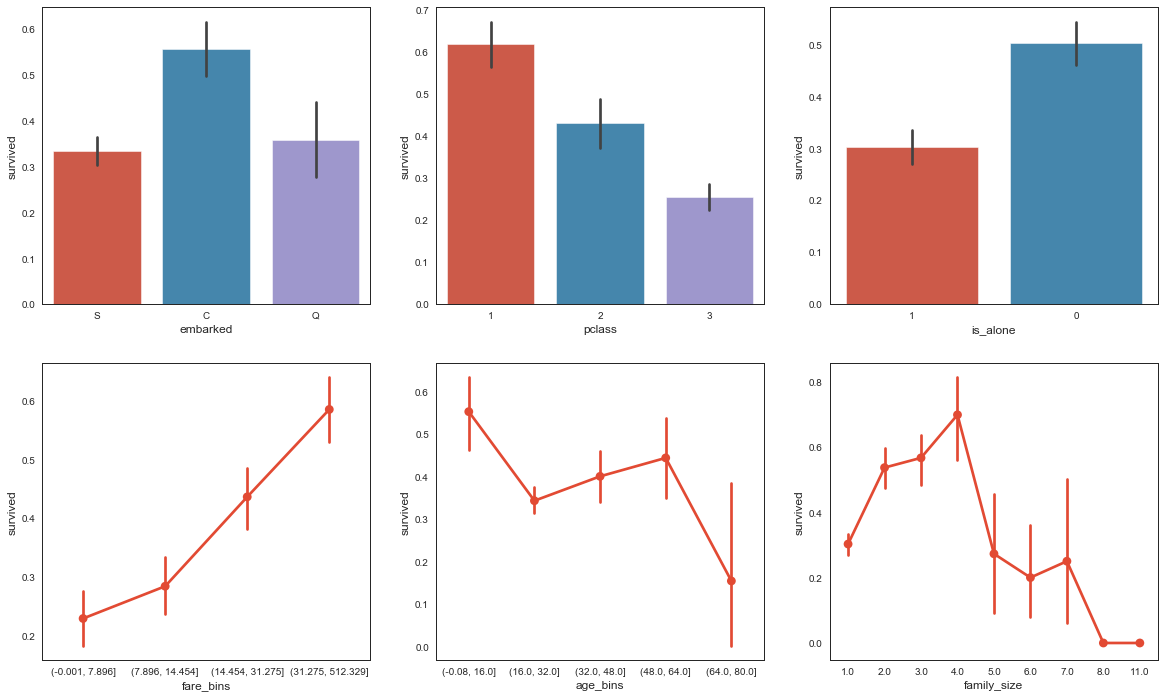

In [425]:
fig, axis= plt.subplots(2,3, figsize=(20,12))
sns.barplot(x="embarked", y="survived", data=df,ax=axis[0,0])
sns.barplot(x="pclass", y="survived", data=df, order=[1,2,3],ax=axis[0,1])
sns.barplot(x="is_alone", y="survived", data=df, order=[1,0],ax=axis[0,2])

sns.pointplot(x="fare_bins", y="survived",  data=df, ax = axis[1,0])
sns.pointplot(x="age_bins", y="survived",  data=df, ax = axis[1,1])
sns.pointplot(x="family_size", y="survived",  data=df, ax = axis[1,2])
plt.show()


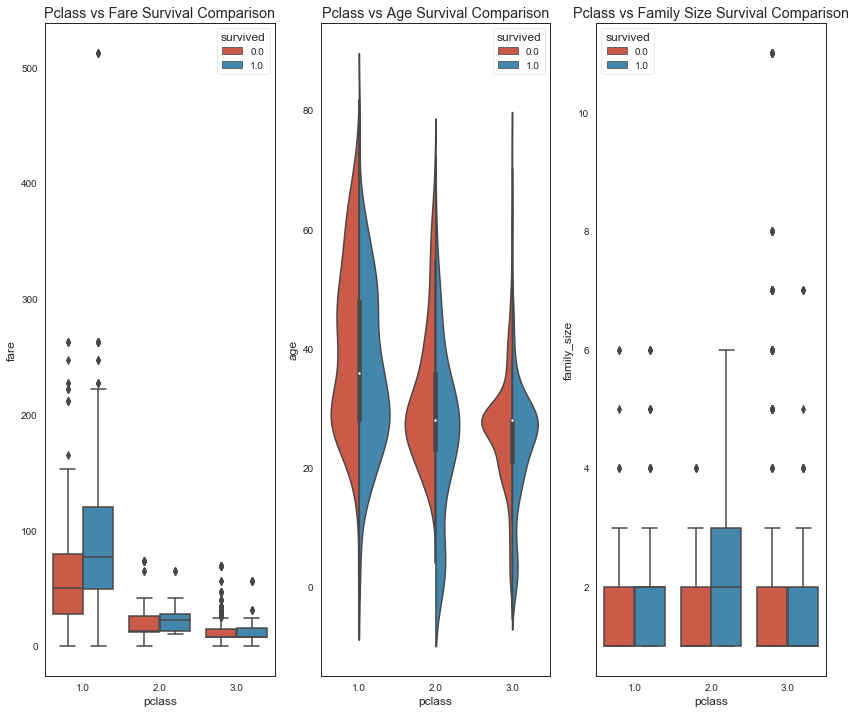

In [426]:
fig, (axis1,axis2,axis3) = plt.subplots(1,3,figsize=(14,12))
sns.boxplot(x="pclass", y="fare", hue="survived", data=df, ax = axis1)
axis1.set_title('Pclass vs Fare Survival Comparison')

sns.violinplot(x="pclass", y="age", hue="survived", data = df, split = True, ax = axis2)
axis2.set_title('Pclass vs Age Survival Comparison')

sns.boxplot(x="pclass", y="family_size", hue="survived", data=df, ax = axis3)
axis3.set_title('Pclass vs Family Size Survival Comparison')

plt.show()

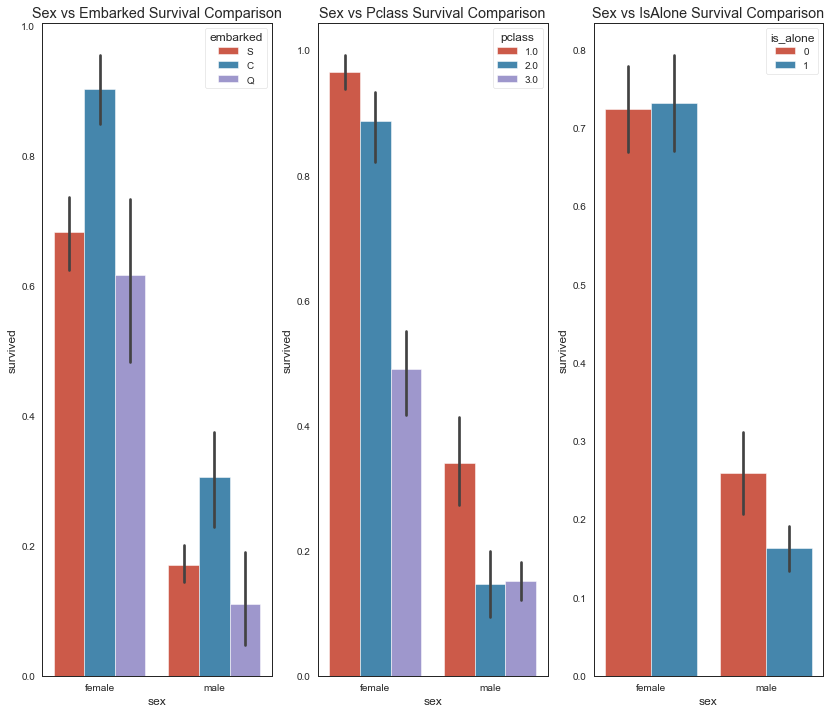

In [427]:
fig, axis = plt.subplots(1,3,figsize=(14,12))
sns.barplot(x ="sex", y = "survived", hue = 'embarked', data=df, ax = axis[0])
axis[0].set_title('Sex vs Embarked Survival Comparison')

sns.barplot(x = 'sex', y = 'survived', hue = 'pclass', data=df, ax  = axis[1])
axis[1].set_title('Sex vs Pclass Survival Comparison')

sns.barplot(x = 'sex', y = 'survived', hue = 'is_alone', data=df, ax  = axis[2])
axis[2].set_title('Sex vs IsAlone Survival Comparison')

plt.show()

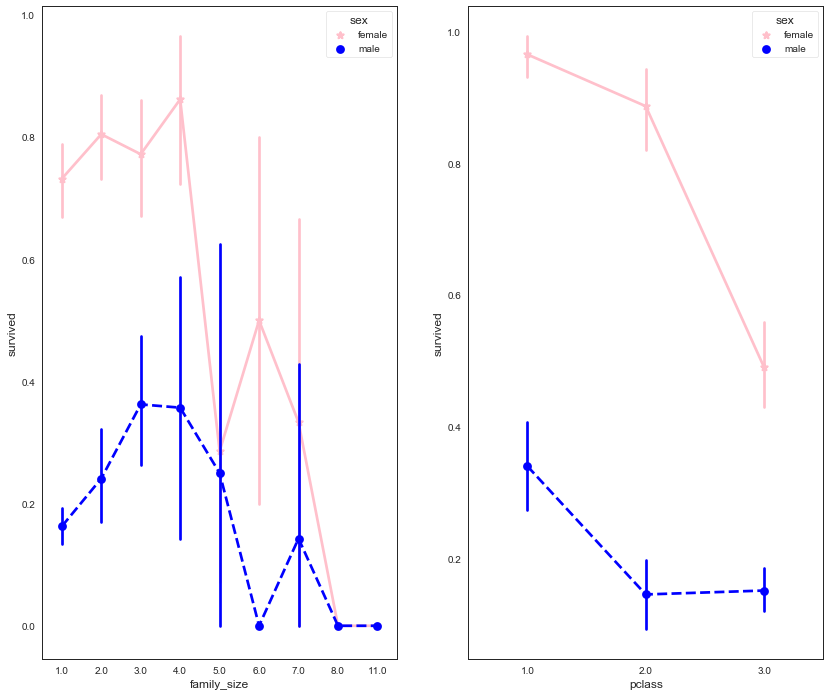

In [428]:
fig, (axis1, axis2) = plt.subplots(1, 2,figsize=(14,12))

#how does family size factor with sex & survival compare
sns.pointplot(x="family_size", y="survived", hue="sex", data=df,
              palette={"male": "blue", "female": "pink"},
              markers=["*", "o"], linestyles=["-", "--"], ax = axis1)

#how does class factor with sex & survival compare
sns.pointplot(x="pclass", y="survived", hue="sex", data=df,
              palette={"male": "blue", "female": "pink"},
              markers=["*", "o"], linestyles=["-", "--"], ax = axis2)

plt.show()

C:\Users\Zanjbeel Khan\anaconda3\lib\site-packages\seaborn\axisgrid.py:728: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\Zanjbeel Khan\anaconda3\lib\site-packages\seaborn\axisgrid.py:733: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


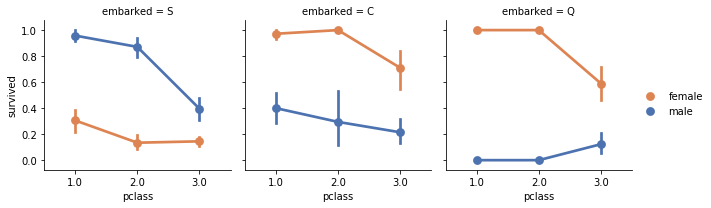

In [410]:
#how does embark port factor with class, sex, and survival compare
#facetgrid: https://seaborn.pydata.org/generated/seaborn.FacetGrid.html
e = sns.FacetGrid(df, col = 'embarked')
e.map(sns.pointplot, 'pclass', 'survived', 'sex', ci=95.0, palette = 'deep')
e.add_legend()

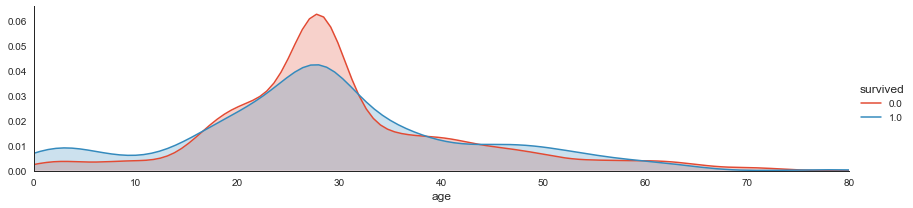

In [429]:
#plot distributions of age of passengers who survived or did not survive
a = sns.FacetGrid( df, hue = 'survived', aspect=4 )
a.map(sns.kdeplot, 'age', shade= True )
a.set(xlim=(0 , df['age'].max()))
a.add_legend()

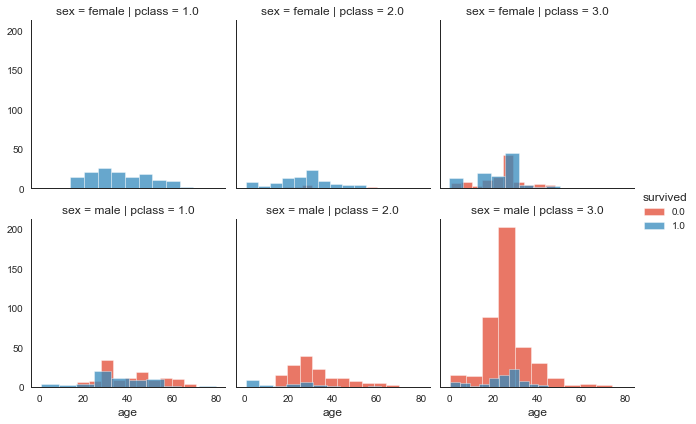

In [430]:
#histogram comparison of sex, class, and age by survival
h = sns.FacetGrid(df, row = 'sex', col = 'pclass', hue = 'survived')
h.map(plt.hist, 'age', alpha = .75)
h.add_legend()

#pair plots of entire dataset
pp = sns.pairplot(df, hue = 'survived', palette = 'deep', height=1.2, diag_kind = 'kde', diag_kws=dict(shade=True), plot_kws=dict(s=10) )
pp.set(xticklabels=[])

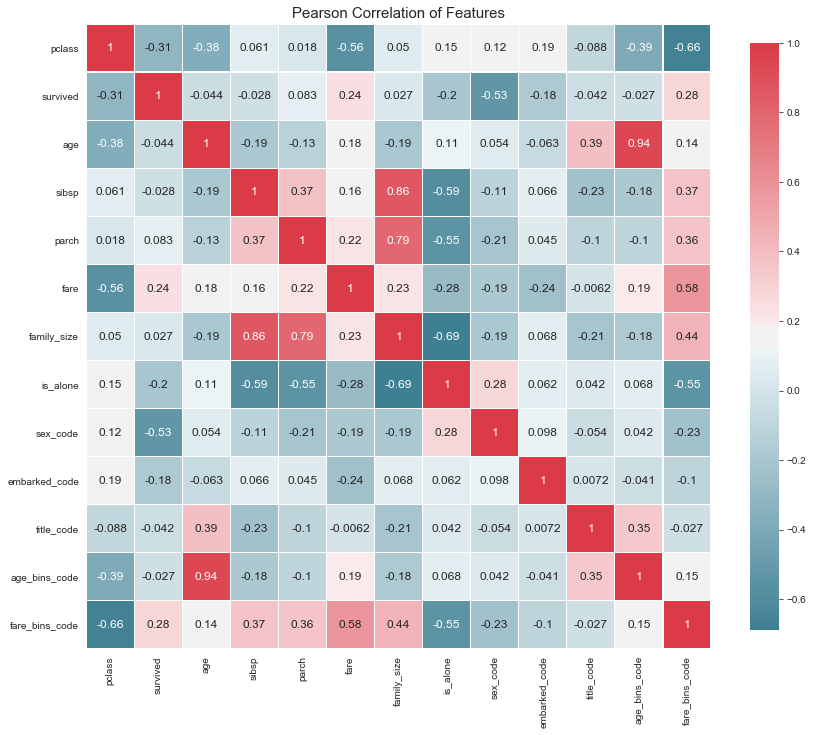

In [431]:
#correlation heatmap of dataset
def correlation_heatmap(dataframe):
    _ , ax = plt.subplots(figsize =(14, 12))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(
        df.corr(), 
        cmap = colormap,
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12 }
    )
    
    plt.title('Pearson Correlation of Features', y=1.05, size=15)

correlation_heatmap(df)

## Model Data

### Load Data Modelling Libraries

In [432]:
#Common Model Algorithms
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process

#Common Model Helpers
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics

### Machine Learning Algorithm (MLA) Selection and Initialization

In [483]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

MLA = [
    #Ensemble Methods
    ensemble.AdaBoostClassifier(),
    ensemble.BaggingClassifier(),
    ensemble.ExtraTreesClassifier(),
    ensemble.GradientBoostingClassifier(),
    ensemble.RandomForestClassifier(),

    #Gaussian Processes
    gaussian_process.GaussianProcessClassifier(),
    
    #GLM
    linear_model.LogisticRegressionCV(),
    linear_model.PassiveAggressiveClassifier(),
    linear_model.RidgeClassifierCV(),
    linear_model.SGDClassifier(),
    linear_model.Perceptron(),
    
    #Navies Bayes
    naive_bayes.BernoulliNB(),
    naive_bayes.GaussianNB(),
    
    #Nearest Neighbor
    neighbors.KNeighborsClassifier(),
    
    #SVM
    svm.SVC(probability=True),
    svm.NuSVC(probability=True),
    svm.LinearSVC(),
    
    #Trees    
    tree.DecisionTreeClassifier(),
    tree.ExtraTreeClassifier(),
    
    #Discriminant Analysis
    discriminant_analysis.LinearDiscriminantAnalysis(),
    discriminant_analysis.QuadraticDiscriminantAnalysis(),
   
    ]

In [484]:
#split dataset in cross-validation with this splitter
#note: this is an alternative to train_test_split
cv_split = model_selection.ShuffleSplit(n_splits = 10, test_size = .3, train_size = .6, random_state = 0 ) 
# run model 10x with 60/30 split intentionally leaving out 10%
# this model_selection is from sklearn 

In [485]:
#create table to compare MLA metrics
MLA_columns = ['MLA Name', 'MLA Parameters','MLA Train Accuracy Mean', 'MLA Test Accuracy Mean', 'MLA Test Accuracy 3*STD' ,'MLA Time']
MLA_compare = pd.DataFrame(columns = MLA_columns)
MLA_compare

,MLA Name,MLA Parameters,MLA Train Accuracy Mean,MLA Test Accuracy Mean,MLA Test Accuracy 3*STD,MLA Time


In [486]:
#create table to compare MLA predictions
MLA_predict = df[Target]
MLA_predict

,survived
0,1.0
1,1.0
2,0.0
3,0.0
4,0.0
...,...
1304,0.0
1305,0.0
1306,0.0
1307,0.0


In [487]:
 #defining y variable
target=["survived"]
    
#pretty name/values for charts
df_x = ['sex','pclass', 'embarked', 'title','sibsp', 'parch', 'age', 'fare', 'family_size', 'is_alone']

#coded for algorithm calculation
df_x_calc = ['sex_Code','pclass', 'embarked_code', 'title_code','sibsp', 'parch', 'age', 'fare']

#define x variables for original w/bin features to remove continuous variables
df_x_bin = ['sex_code','pclass', 'embarked_code', 'title_code', 'family_size', 'age_bins_code', 'fare_bins_code']

In [488]:
train_x,test_x,train_y,test_y= train_test_split(df[df_x ], df[target], random_state=0)
train_x_bin,test_x_bin,train_y_bin,test_y_bin= train_test_split(df[df_x_bin], df[target], random_state=0)

In [494]:
import warnings
warnings.filterwarnings("ignore")

#index through MLA and save performance to table
row_index = 0
for alg in MLA:

    #set name and parameters
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index, 'MLA Name'] = MLA_name
    MLA_compare.loc[row_index, 'MLA Parameters'] = str(alg.get_params())
    
    #score model with cross validation: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html#sklearn.model_selection.cross_validate
    cv_results = model_selection.cross_validate(alg, df[df_x_bin], df[target], cv  = cv_split, return_train_score=True )

    MLA_compare.loc[row_index, 'MLA Time'] = cv_results['fit_time'].mean()
    MLA_compare.loc[row_index, 'MLA Train Accuracy Mean'] = cv_results['train_score'].mean() 
    MLA_compare.loc[row_index, 'MLA Test Accuracy Mean'] = cv_results['test_score'].mean()   
    #if this is a non-bias random sample, then +/-3 standard deviations (std) from the mean, should statistically capture 99.7% of the subsets
    MLA_compare.loc[row_index, 'MLA Test Accuracy 3*STD'] = cv_results['test_score'].std()*3   #let's know the worst that can happen!
    

    alg.fit(df[df_x_bin], df[target])
    MLA_predict[MLA_name] = alg.predict(df[df_x_bin])
    
    row_index+=1


In [495]:
MLA_compare.sort_values(by = ['MLA Test Accuracy Mean'], ascending = False, inplace = True)
MLA_compare

,MLA Name,MLA Parameters,MLA Train Accuracy Mean,MLA Test Accuracy Mean,MLA Test Accuracy 3*STD,MLA Time
15,NuSVC,"{'break_ties': False, 'cache_size': 200, 'clas...",0.819745,0.812468,0.0651365,0.138739
14,SVC,"{'C': 1.0, 'break_ties': False, 'cache_size': ...",0.821783,0.812468,0.0647776,0.138128
3,GradientBoostingClassifier,"{'ccp_alpha': 0.0, 'criterion': 'friedman_mse'...",0.844713,0.808651,0.0496829,0.302608
5,GaussianProcessClassifier,"{'copy_X_train': True, 'kernel': None, 'max_it...",0.851083,0.801272,0.0726956,1.00111
4,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",0.877325,0.801272,0.0684857,0.321897
20,QuadraticDiscriminantAnalysis,"{'priors': None, 'reg_param': 0.0, 'store_cova...",0.809172,0.800509,0.0677801,0.00508807
2,ExtraTreesClassifier,"{'bootstrap': False, 'ccp_alpha': 0.0, 'class_...",0.877452,0.797455,0.0890353,0.370877
0,AdaBoostClassifier,"{'algorithm': 'SAMME.R', 'base_estimator': Non...",0.809554,0.797201,0.0707951,0.21711
1,BaggingClassifier,"{'base_estimator': None, 'bootstrap': True, 'b...",0.872994,0.794402,0.0606666,0.0484391
18,ExtraTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",0.877452,0.794402,0.0776828,0.00777855


In [496]:
MLA_predict

,survived,AdaBoostClassifier,BaggingClassifier,ExtraTreesClassifier,GradientBoostingClassifier,RandomForestClassifier,GaussianProcessClassifier,LogisticRegressionCV,PassiveAggressiveClassifier,RidgeClassifierCV,...,BernoulliNB,GaussianNB,KNeighborsClassifier,SVC,NuSVC,LinearSVC,DecisionTreeClassifier,ExtraTreeClassifier,LinearDiscriminantAnalysis,QuadraticDiscriminantAnalysis
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,...,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1305,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0
1306,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1307,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


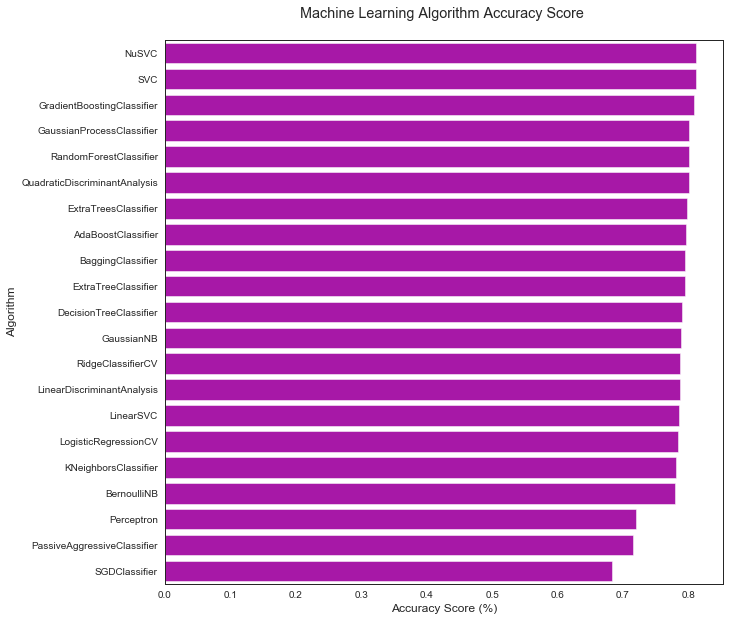

In [498]:
plt.figure(figsize=(10,10))
sns.barplot(x='MLA Test Accuracy Mean', y = 'MLA Name', data = MLA_compare, color = 'm')
plt.title('Machine Learning Algorithm Accuracy Score \n')
plt.xlabel('Accuracy Score (%)')
plt.ylabel('Algorithm')
plt.show()